In [20]:
pip install mca

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torch


     -------------------------------------- 167.2/167.2 MB 2.3 MB/s eta 0:00:00


In [26]:
import mca
import pandas as pd
import numpy as np
from fanalysis.mca import MCA

In [48]:
import pandas as pd
import mca
import pandas as pd
import numpy as np
from scipy.linalg import diagsvd
%matplotlib inline
import matplotlib.pyplot as plt


import functools
def Matrix_mult(*args):
    """An internal method to multiply matrices."""
    return functools.reduce(np.dot, args)

np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
pd.set_option('display.precision', 5)
pd.set_option('display.max_columns', 25)

In [6]:
df = pd.read_csv("ballon_tire.csv")
df

,idBallon,Color,Size,Action,Age,Inflated
0,0,YELLOW,SMALL,STRETCH,ADULT,T
1,1,YELLOW,SMALL,STRETCH,CHILD,F
2,2,YELLOW,SMALL,DIP,ADULT,F
3,3,YELLOW,SMALL,DIP,CHILD,F
4,4,YELLOW,LARGE,STRETCH,ADULT,T
5,5,YELLOW,LARGE,STRETCH,ADULT,T
6,6,YELLOW,LARGE,STRETCH,CHILD,F
7,7,YELLOW,LARGE,DIP,ADULT,F
8,8,YELLOW,LARGE,DIP,CHILD,F
9,9,PURPLE,SMALL,STRETCH,ADULT,T


In [13]:
dfBinary = pd.get_dummies(df)
dfBinary.set_index(['idBallon'], inplace = True)
dfBinary

,Color_PURPLE,Color_YELLOW,Size_LARGE,Size_SMALL,Action_DIP,Action_STRETCH,Age_ADULT,Age_CHILD,Inflated_F,Inflated_T
idBallon,,,,,,,,,,
0,0,1,0,1,0,1,1,0,0,1
1,0,1,0,1,0,1,0,1,1,0
2,0,1,0,1,1,0,1,0,1,0
3,0,1,0,1,1,0,0,1,1,0
4,0,1,1,0,0,1,1,0,0,1
5,0,1,1,0,0,1,1,0,0,1
6,0,1,1,0,0,1,0,1,1,0
7,0,1,1,0,1,0,1,0,1,0
8,0,1,1,0,1,0,0,1,1,0


In [15]:
dfBinary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Color_PURPLE    19 non-null     uint8
 1   Color_YELLOW    19 non-null     uint8
 2   Size_LARGE      19 non-null     uint8
 3   Size_SMALL      19 non-null     uint8
 4   Action_DIP      19 non-null     uint8
 5   Action_STRETCH  19 non-null     uint8
 6   Age_ADULT       19 non-null     uint8
 7   Age_CHILD       19 non-null     uint8
 8   Inflated_F      19 non-null     uint8
 9   Inflated_T      19 non-null     uint8
dtypes: uint8(10)
memory usage: 342.0 bytes


In [16]:
ncols = 10

In [29]:
X = dfBinary.values
X

array([[0, 1, 0, 1, 0, 1, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
       [1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 1, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 1, 0, 0, 1, 1, 0],
       [1, 0, 1, 0, 0, 1, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 1, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 1, 0, 1, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]], dtype=uint8)

In [39]:
my_mca = MCA(row_labels=dfBinary.index.values[:], var_labels=dfBinary.columns.values[:])

In [40]:
my_mca.fit(X)

MCA(row_labels=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64),
    var_labels=array(['Color_PURPLE', 'Color_YELLOW', 'Size_LARGE', 'Size_SMALL',
       'Action_DIP', 'Action_STRETCH', 'Age_ADULT', 'Age_CHILD',
       'Inflated_F', 'Inflated_T'], dtype=object))

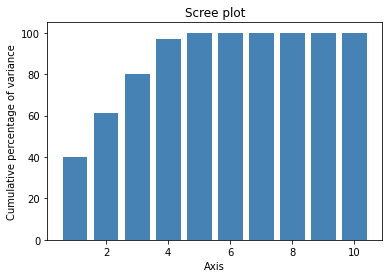

In [31]:
my_mca.plot_eigenvalues(type="cumulative")

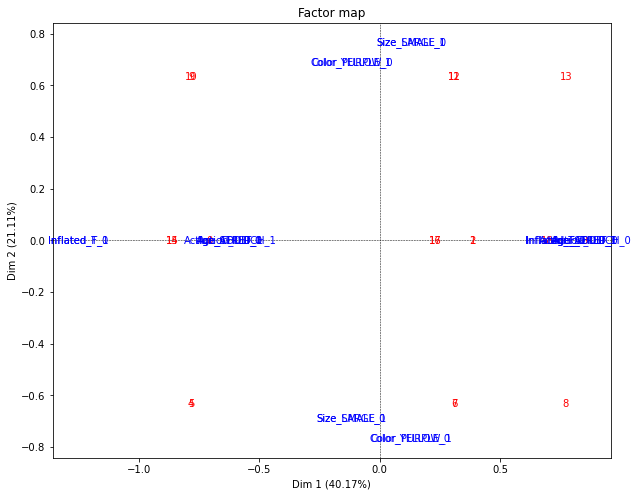

In [67]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_mca.mapping(num_x_axis=1, num_y_axis=2, short_labels = False,figsize=(10, 8))

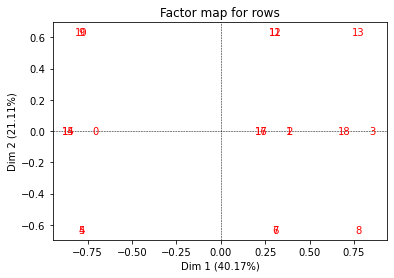

In [54]:
my_mca.mapping_row(num_x_axis=1, num_y_axis=2)

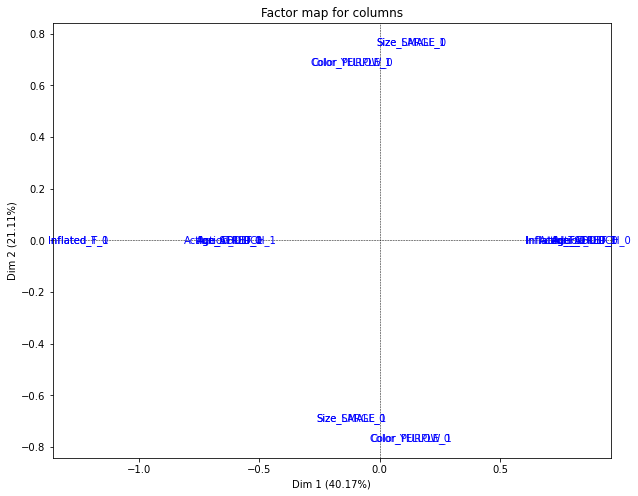

In [59]:
my_mca.mapping_col(num_x_axis=1, num_y_axis=2,short_labels = False, figsize=(10, 8))

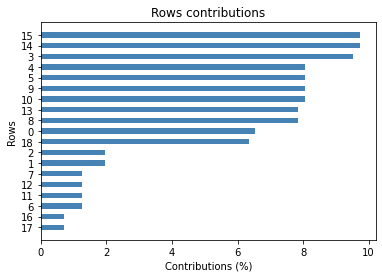

In [35]:
my_mca.plot_row_contrib(num_axis=1)

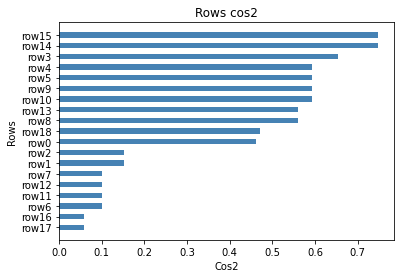

In [36]:
my_mca.plot_row_cos2(num_axis=1)

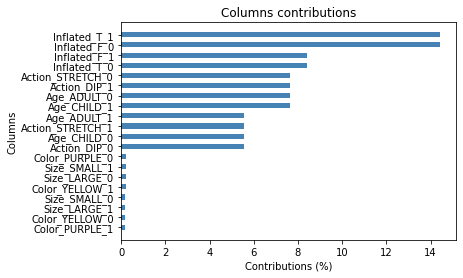

In [61]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_mca.plot_col_contrib(num_axis=1,short_labels = False)

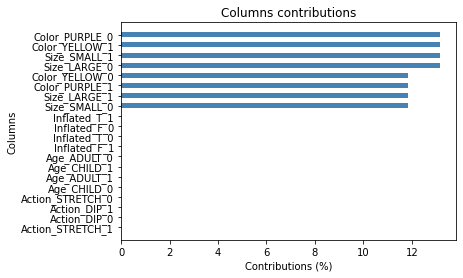

In [63]:
my_mca.plot_col_contrib(num_axis=2, short_labels = False)

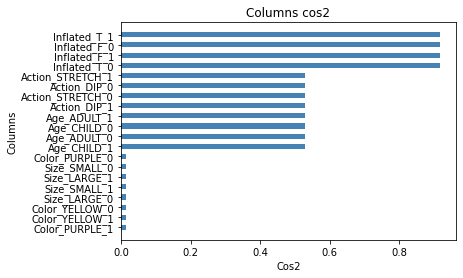

In [65]:
my_mca.plot_col_cos2(num_axis=1, short_labels = False)